### 1 Number Classes

In [24]:
n1=0
n1+=1
n2=2.0
n1 = float(n1)
print(n1,type(n2), int(n2), n1+n2)

x=2
y=3
print(x*y)
print(x**y)
print(x/y)
print(x==y)

1.0 <class 'float'> 2 3.0


False

In [22]:
# is x not equal to y 
x!=y

True

In [23]:
# is x greater than y 
x>y

False

In [24]:
# is x equal to y minus 1 
x==y-1

True

In [25]:
type(x==y-1)

bool

### 2 Booleans 

#### 2.1 Boolean values 

In [26]:
# create a Boolean b1 and assign the value True 
b1=True

In [27]:
b1

True

In [28]:
print(b1)

True


In [29]:
type(b1)

bool

#### 2.2 Logical Operators

In [30]:
# and: true if the two statements are true 
# or: true if at least one of the two statements is true 
# not: true if the statement if false 

In [31]:
True and True

True

In [32]:
n2>n1 and x<y

True

In [33]:
True or False

True

In [34]:
n2>n1 or x>y

True

In [35]:
not False

True

In [36]:
not n2<n1

True

In [37]:
# order of the logical operators 
# 1st not 
# 2nd and 
# 3rd or 

In [38]:
not n2<n1 and x<y or x>y # (True and True) or (False) = True or False =True

True

In [39]:
# not is evaluated first: = [(not False = true) and (True)] or (False) = True and True or False = [True] or (False)
not False and True or False

True

In [40]:
# and is evaluated second 
True and True or False

True

In [41]:
# or is evaluated last 
True or False

True

### 3 Strings 

In [23]:
s1 = 'Finance'
print (s1)
print(type(s1))
print('Welcome to ' + s1 + ' 559')
print(s1[0])
s1[-1]

Finance
<class 'str'>
Welcome to Finance 559
F


'e'

### 4 Lists

In [21]:
# create a list l1 that includes the 5 Tickers
l1 = ['AAPL','MSFT','GOOGL','INTC','IBM']
type(l1)
len(l1)
l1[0]
l1[-1]
l1[-1]='META'
l1[:3] # l1[0:3]
l1.index('META')
l1.append('ORCL')
l1.insert(-2,'IBM')
l1.append(['WMT','AMZN'])
l1.remove(['WMT','AMZN'])
l1.extend(['WMT', 'AMZN'])
del l1[-1]
l1.pop(-1)
l1.sort(reverse=True)
l1

['ORCL', 'MSFT', 'META', 'INTC', 'IBM', 'GOOGL', 'AAPL']

### 5 Dictionaries 

In [17]:
d1= {'AAPL':251.04,'MSFT':451.59,'GOOGL':198.16,'INTC':20.83,'IBM':229.33}
print(type(d1))
print('length', len(d1))
print(d1.keys())
print(d1.values())
print(d1.items())
print(d1['AAPL'])
d1['AAPL']=300
d1['META']=624.24
del d1['META']
d1

<class 'dict'>
length 5
dict_keys(['AAPL', 'MSFT', 'GOOGL', 'INTC', 'IBM'])
dict_values([251.04, 451.59, 198.16, 20.83, 229.33])
dict_items([('AAPL', 251.04), ('MSFT', 451.59), ('GOOGL', 198.16), ('INTC', 20.83), ('IBM', 229.33)])
251.04


{'AAPL': 300, 'MSFT': 451.59, 'GOOGL': 198.16, 'INTC': 20.83, 'IBM': 229.33}

### Project Content
1. Data Visualization
2. Machine Learning
3. Linear Regression
4. Logistic Regression
5. Variable Selection


## Part 1 Data Visualization


### 1.1 Scatter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# 1. single scatter plot
mpg = pd.read_csv('mpg.csv')

mpg['cyl'].value_counts().sort_index()
mpg.plot.scatter(x='displ',y='hwy',c=mpg['cyl'], s=mpg['cyl']*10, alpha=mpg['cyl']/ mpg['cyl'].max(), marker='^', cmap='coolwarm',figsize=(10, 5));

# 2. scatter subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flatten() 
for i, cls in enumerate(mpg['class'].unique()):
    subset = mpg[mpg['class'] == cls]
    axes[i].scatter(x=subset['displ'], y=subset['hwy'])
    axes[i].set_title(cls)
    axes[i].set_xlabel('Engine Size')
    axes[i].set_ylabel('Highway Miles Per Gallon')
axes[7].set_axis_off()
axes[8].set_axis_off();

FileNotFoundError: [Errno 2] No such file or directory: 'mpg.csv'

### 1.2 Line Plot

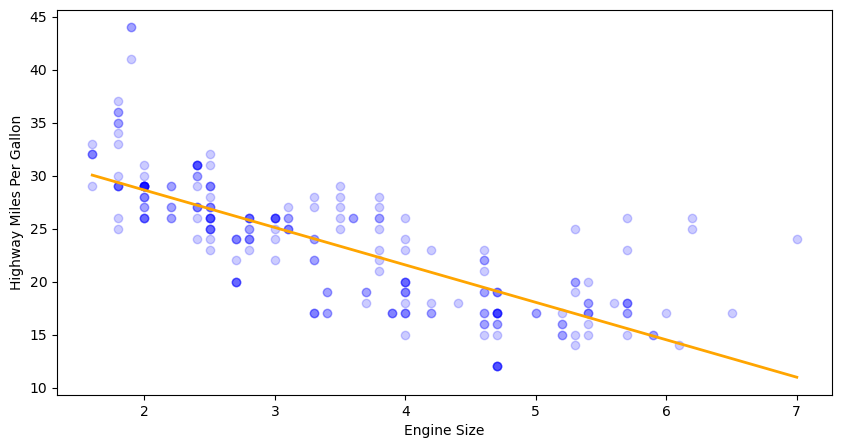

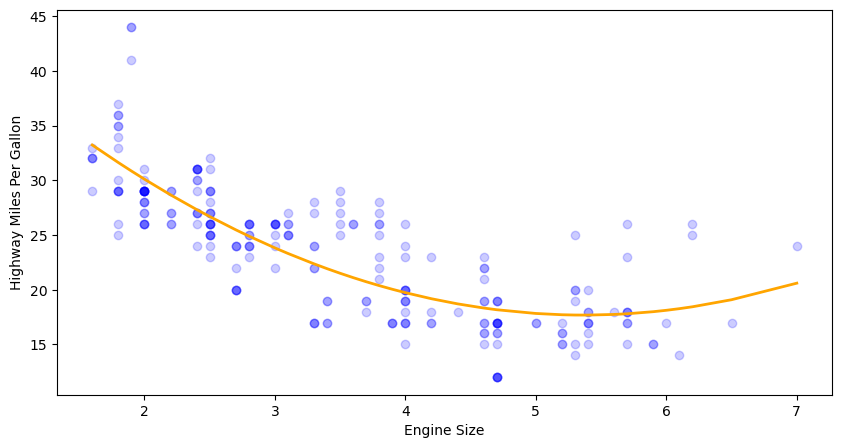

In [5]:
# Simple linear regression
# 1. linear trend line 
lm1 = sm.ols(formula='hwy ~ displ', data=mpg).fit()
lm1.summary()

mpg['hwy_fitted_lm1'] = lm1.fittedvalues
mpg_sorted = mpg.sort_values(by='displ')

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=mpg['displ'], y=mpg['hwy'], alpha=0.2, color='blue')
ax.plot(mpg_sorted['displ'], mpg_sorted['hwy_fitted_lm1'], color='orange', linewidth=2)
ax.set_xlabel('Engine Size')
ax.set_ylabel('Highway Miles Per Gallon');

# 2. Quadratic Trend line¶
mpg['displ_sqr'] = mpg['displ']**2

lm2 = sm.ols(formula='hwy ~ displ + displ_sqr', data=mpg).fit()
lm2.summary()

mpg['hwy_fitted_lm2'] = lm2.fittedvalues
mpg_sorted = mpg.sort_values(by='displ')

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=mpg['displ'], y=mpg['hwy'], alpha=0.2, color='blue')
ax.plot(mpg_sorted['displ'], mpg_sorted['hwy_fitted_lm2'], color='orange', linewidth=2)
ax.set_xlabel('Engine Size')
ax.set_ylabel('Highway Miles Per Gallon');

### 1.3 Histogram

In [ ]:
# 1. group Highway Miles Per Gallon
mpg['hwy'].plot.hist(bins=8, color='blue',  edgecolor='white', figsize=(10, 5))
plt.xlabel('Highway Miles Per Gallon');

mpg.groupby('class').agg(hwy_mean=('hwy','mean')).plot.bar(color='blue', figsize=(10, 5));

mpg.groupby('displ').agg(hwy_mean=('hwy','mean')).reset_index().plot.scatter(x='displ', y='hwy_mean', color='blue', figsize=(10, 5));

lm3 = sm.ols(formula="hwy_mean ~ displ", data=hwy_mean_by_displ).fit()
lm3.summary()

hwy_mean_by_displ['hwy_mean_fitted_lm3'] = lm3.fittedvalues
hwy_mean_by_displ_sorted = hwy_mean_by_displ.sort_values(by='displ')

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=hwy_mean_by_displ['displ'], y=hwy_mean_by_displ['hwy_mean'], color='blue')
ax.plot(hwy_mean_by_displ_sorted['displ'], hwy_mean_by_displ_sorted['hwy_mean_fitted_lm3'], color='orange', linewidth=2)
ax.set_xlabel('Engine Size')
ax.set_ylabel('Average Highway Miles Per Gallon');

## Part 2 Machine Learning


KeyError: 'y_hat'

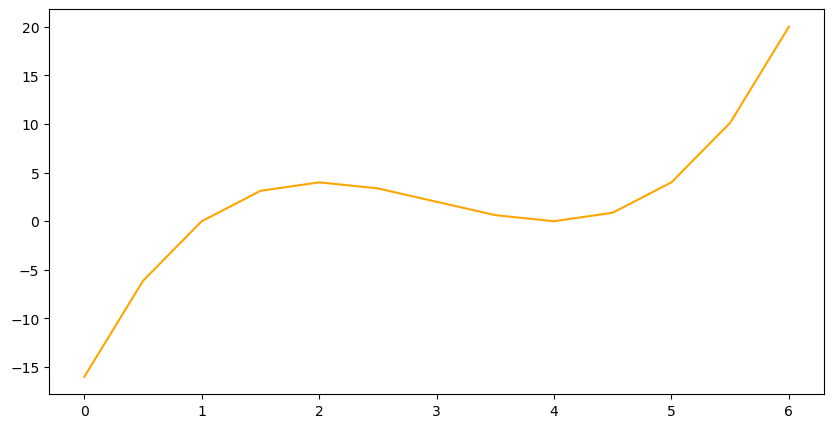

In [6]:
# load packages  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. True function f(x), white noise function draw() & visualization
def f(x):
    return -16 + 24 * x - 9 * x ** 2 + x ** 3
    
def draw(at=None, n=None, sd=None, fun=f):
    if at is None:
        at = np.random.uniform(low=0, high=6, size=n)  
    x=at
    f_x = fun(at)  
    epsilon = np.random.normal(loc=0, scale=sd, size=len(at)) 
    y = f_x + epsilon  
    result_df = pd.DataFrame({"x": x,"f": f_x,"epsilon": epsilon,"y": y})
    return result_df

np.random.seed(1)
data=draw(at=np.arange(0, 6.5, 0.5), sd=10)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data["x"], data["f"], color="orange", linewidth=1.5, label="true expected value f(x)")
ax.plot(data["x"], data["y_hat"], color="blue", linewidth=3, alpha=0.5, label="predicted outcome y_hat")
ax.scatter(x=data["x"], y=data["y"], s=30, color="black",label="realized outcome y")
ax.set_xlabel("x")
ax.legend(); 

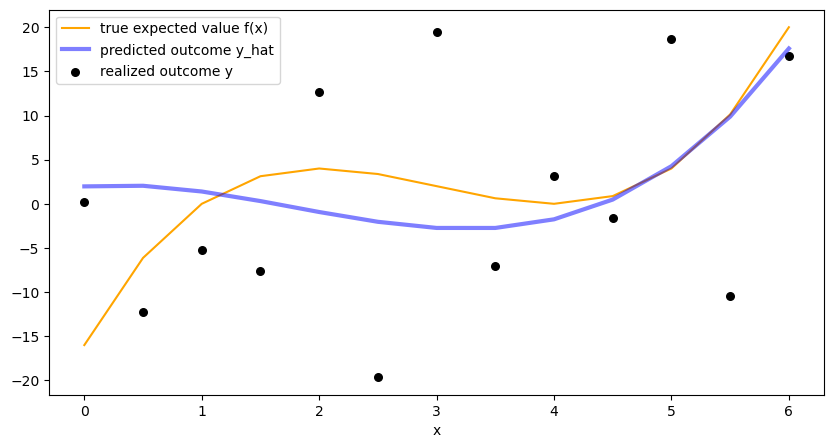

In [3]:
# 2. Linear machine learning regression function f_hat() & visualization
def f_hat(test_data, training_data, deg):
    poly = PolynomialFeatures(degree=deg)
    model = LinearRegression().fit(poly.fit_transform(training_data[["x"]]), training_data["y"])
    test_data["y_hat"] = model.predict(poly.fit_transform(test_data[["x"]]))
    return test_data

np.random.seed(1)
data=f_hat(test_data=draw(at=np.arange(0, 6.5, 0.5), sd=10), training_data=draw(n=10, sd=10), deg=3)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(data["x"], data["f"], color="orange", linewidth=1.5, label="true expected value f(x)")
ax.plot(data["x"], data["y_hat"], color="blue", linewidth=3, alpha=0.5, label="predicted outcome y_hat")
ax.scatter(x=data["x"], y=data["y"], s=30, color="black",label="realized outcome y")
ax.set_xlabel("x")
ax.legend(); 

In [4]:
# 3. Non-linear machine learning regression function f_hat() & visualization
f_hat_list = [None] * 1000
np.random.seed(1)
for i in range(1000):
    f_hat_list[i] = f_hat(test_data=draw(at=np.arange(0, 6.5, 0.5), sd=10), training_data=draw(n=10, sd=10), deg=3)
combined_df = pd.concat(f_hat_list, keys=range(1000), names=["id"]).reset_index(level="id").reset_index(drop=True)

f_hat_sum = pd.DataFrame(data={
    "x": combined_df.groupby("x")["y_hat"].mean().index, 
    "y_hat_mean": combined_df.groupby("x")["y_hat"].mean().values,
    "f_mean": combined_df.groupby("x")["f"].mean().values,
    "mse": combined_df.groupby("x").apply(lambda df: np.mean((df["y"] - df["y_hat"]) ** 2), include_groups=False).values,
    "noise": combined_df.groupby("x").apply(lambda df: np.mean(df["epsilon"] ** 2), include_groups=False).values,
    "bias_squared": combined_df.groupby("x").apply(lambda df: (np.mean(df["f"] - df["y_hat"])) ** 2, include_groups=False).values,
    "variance": combined_df.groupby("x")["y_hat"].var().values})

fig, ax = plt.subplots(figsize=(10, 5))
for key, group in combined_df.groupby("id"):
    ax.plot(group["x"], group["y_hat"], color="purple", linewidth=0.2, alpha=1/30)
ax.plot(f_hat_sum["x"], f_hat_sum["f_mean"], color="orange", linewidth=1.5, label="average true expected value")
ax.plot(f_hat_sum["x"], f_hat_sum["y_hat_mean"], color="blue", linewidth=3, alpha=0.5, label="average predicted outcome")
ax.set_xlabel("x")
ax.set_ylim(-40, 40)
ax.legend();
print(f_hat_sum.mean())

NameError: name 'f_hat' is not defined

## Part 3 Linear Regression

Intercept                120917.142857
Season_Sold_2[T.True]     19961.677143
Season_Sold_3[T.True]     16492.657143
Season_Sold_4[T.True]     24060.114286
dtype: float64

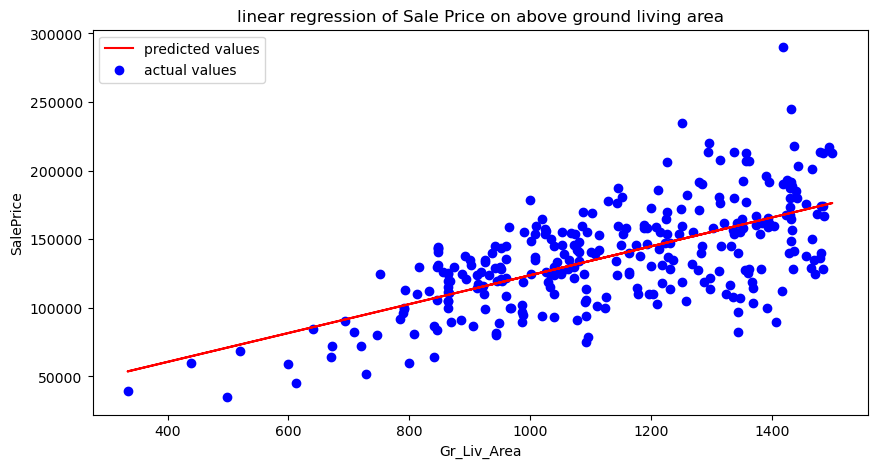

In [17]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

housing_df = pd.read_csv("ameshousing.csv")
# 1. intercept
lm1 = sm.ols(formula="SalePrice ~ 1", data=housing_df).fit()
lm1.summary()
lm1.params

# 2. simple linear
lm2 = sm.ols(formula="SalePrice ~ Gr_Liv_Area", data=housing_df).fit()
lm3 = sm.ols(formula="SalePrice ~Bedroom_AbvGr", data=housing_df).fit()
lm2.summary()
lm2.params
lm2.predict(housing_df)
housing_df.groupby(["Season_Sold"]).agg(SalePrice_mean=('SalePrice', 'mean'))
fig, ax=plt.subplots(figsize=(10,5))
ax.plot(housing_df["Gr_Liv_Area"], lm2.fittedvalues,color="red",label="predicted values")
ax.scatter(housing_df["Gr_Liv_Area"], housing_df["SalePrice"], color="blue",label="actual values")
ax.set_xlabel("Gr_Liv_Area")
ax.set_ylabel("SalePrice")
ax.set_title("linear regression of Sale Price on above ground living area")
ax.legend();

lm3.summary()
lm3.params
lm3.predict(housing_df)

# 3. Introduce dummy (如果兩個 dummy 級距過大，需使用 category variable )
x = pd.get_dummies(housing_df[["Heating_QC"]], drop_first=True)
lm4 = sm.ols(formula="SalePrice ~ Heating_QC_Fa+Heating_QC_Gd+Heating_QC_TA", 
             data=pd.concat([housing_df, x], axis="columns")).fit()
lm4.summary()
lm4.params

housing_df["Season_Sold"] = housing_df["Season_Sold"].astype("str")
y = pd.get_dummies(housing_df[["Season_Sold"]], drop_first=True)
lm5 = sm.ols(formula="SalePrice ~ Season_Sold_2 + Season_Sold_3 + Season_Sold_4", 
             data=pd.concat([housing_df, y], axis="columns")).fit()
lm5.summary()
lm5.params

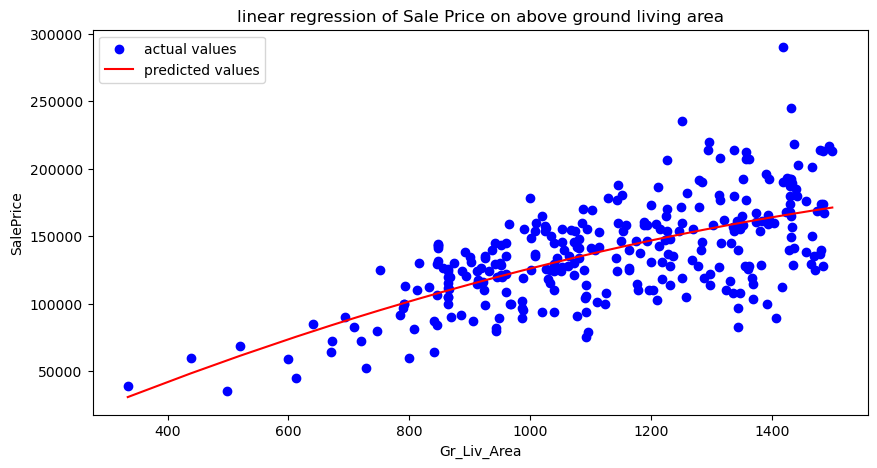

In [15]:
# 4. Multi-linear: y = r + a*dummy + b*numeric
lm6 = sm.ols(formula="SalePrice ~ Gr_Liv_Area+Heating_QC", data=housing_df).fit()
lm6.summary()
lm6.params

# 5. polynomial predictors: y= r + ax + bx**2
housing_df["Gr_Liv_Area_sqr"] = housing_df["Gr_Liv_Area"]**2
lm7 = sm.ols(formula="SalePrice ~ Gr_Liv_Area + Gr_Liv_Area_sqr", data=housing_df).fit()
lm7.summary()
lm7.params

housing_df['Predicted_SalePrice'] = lm7.fittedvalues
housing_df_sorted = housing_df.sort_values(by='Gr_Liv_Area')
fig, ax=plt.subplots(figsize=(10,5))
ax.scatter(housing_df["Gr_Liv_Area"], housing_df["SalePrice"], color="blue",label="actual values")
ax.plot(housing_df_sorted["Gr_Liv_Area"], housing_df_sorted["Predicted_SalePrice"],color="red",label="predicted values")
ax.set_xlabel("Gr_Liv_Area")
ax.set_ylabel("SalePrice")
ax.set_title("linear regression of Sale Price on above ground living area")
ax.legend();

## Part 4  Logistic Regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as smd
import statsmodels.api as sm
import math
from sklearn.metrics import confusion_matrix

bank_df = pd.read_csv("UniversalBank.csv")
bank_df.drop(labels=["ID", "ZIP Code"],axis="columns",inplace=True)

# 1. rename & create categories for "Education" variables
bank_df['Education'] = bank_df['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
bank_df["Education"]=bank_df["Education"].cat.rename_categories(new_categories)
bank_df = pd.get_dummies(bank_df,drop_first=True)

# 2. arrange training and test sets
x = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=202)
train_x = train_x.astype("float")
test_x = test_x.astype("float")

# 3. regression
reg = smd.Logit(endog=train_y, exog=sm.add_constant(train_x)).fit()
reg.summary()
reg.params
pred_prob=reg.predict(sm.add_constant(test_x))
pred_class=np.where(pred_prob>0.5,1,0)
pd.DataFrame(
    confusion_matrix(test_y, pred_class),
    columns = ['predicted 0', 'predicted 1'],
    index = ['actual 0', 'actual 1'])

Optimization terminated successfully.
         Current function value: 0.118653
         Iterations 9


,predicted 0,predicted 1
actual 0,1790,17
actual 1,63,130


## Part 5  Variable Selection


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from statistics import mean
from dmba import exhaustive_search
from dmba import adjusted_r2_score, AIC_score
from dmba import backward_elimination, forward_selection, stepwise_selection

car_df = pd.read_csv("ToyotaCorolla.csv")
predictors = ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
formula = 'Price ~ ' + ' + '.join(predictors)
pd.concat([train_x, train_y], axis="columns")
lm1 = sm.ols(formula=formula, data=pd.concat([train_x, train_y], axis="columns")).fit()
lm2 = LinearRegression()
lm2.fit(train_x, train_y)
pd.DataFrame({'Predictor': train_x.columns, 'coefficient': lm2.coef_})

# 0. exhaustive search for reducing predictors

# 1. backward elimination for reducing predictors



def score_model_backward(model, variables):
    pred_y = model.predict(train_x[variables])
    return AIC_score(train_y, pred_y, model)
model_backward, variables_backward = backward_elimination(train_x.columns, train_model_backward, score_model_backward, verbose=True)
pred_y_backward = model_backward.predict(test_x[variables_backward])

# 2. forward selection for reducing predictors
def train_model_forward(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model
    
def score_model_forward(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    pred_y = model.predict(train_x[variables])
    return AIC_score(train_y, pred_y, model)
model_forward, variables_forward = forward_selection(train_x.columns, train_model_forward, score_model_forward, verbose=True)

pred_y_forward = model_forward.predict(test_x[variables_forward])
MSE_forward = mean((test_y-pred_y_forward)**2)

# 3. stepwise selection for reducing predictors
model_stepwise, variables_stepwise = stepwise_selection(train_x.columns, train_model_forward, score_model_forward, verbose=True)
pred_y_stepwise = model_stepwise.predict(test_x[variables_stepwise])
MSE_stepwise = mean((test_y-pred_y_stepwise)**2)

print(MSE_forward, MSE_stepwise)